# **Phishing URL Detection**

## **Part 1**

#### **Citations/Acknowledgements**

Prasad, A., & Chandra, S. (2023). PhiUSIIL: A diverse security profile empowered phishing URL detection framework based on similarity index and incremental learning. Computers & Security, 103545. doi: https://doi.org/10.1016/j.cose.2023.103545

#### **Remarks**
- Label 1 corresponds to a legitimate URL, label 0 to a phishing URL.
- This dataset comprises 134850 legitimate and 100945 phishing URLs.

#### **Step 1: Loading the dataset**

In [1]:
import pandas as pd

total_data = pd.read_csv('/workspaces/proyecto-final-Phishing-URL/data/raw/PhiUSIIL_Phishing_URL_Dataset.csv')
total_data.head()

FILENAME                                 URL  URLLength  \
0  521848.txt    https://www.southbankmosaics.com         31   
1   31372.txt            https://www.uni-mainz.de         23   
2  597387.txt      https://www.voicefmradio.co.uk         29   
3  554095.txt         https://www.sfnmjournal.com         26   
4  151578.txt  https://www.rewildingargentina.org         33   

                       Domain  DomainLength  IsDomainIP  TLD  \
0    www.southbankmosaics.com            24           0  com   
1            www.uni-mainz.de            16           0   de   
2      www.voicefmradio.co.uk            22           0   uk   
3         www.sfnmjournal.com            19           0  com   
4  www.rewildingargentina.org            26           0  org   

   URLSimilarityIndex  CharContinuationRate  TLDLegitimateProb  ...  Pay  \
0               100.0              1.000000           0.522907  ...    0   
1               100.0              0.666667           0.032650  ...    0   
2               100.0              0.866667           0.028555  ...    0   
3               100.0              1.000000           0.522907  ...    1   
4               100.0              1.000000           0.079963  ...    1   

   Crypto  HasCopyrightInfo  NoOfImage  NoOfCSS  NoOfJS  NoOfSelfRef  \
0       0                 1         34       20      28          119   
1       0                 1         50        9       8           39   
2       0                 1         10        2       7           42   
3       1                 1          3       27      15           22   
4       0                 1        244       15      34           72   

   NoOfEmptyRef  NoOfExternalRef  label  
0             0              124      1  
1             0              217      1  
2             2                5      1  
3             1               31      1  
4             1               85      1  

[5 rows x 56 columns]

In [2]:
# Drop atribute "FILENAME" as cited by the authors:

total_data.drop(columns=['FILENAME'], inplace=True)
total_data.head()

URL  URLLength                      Domain  \
0    https://www.southbankmosaics.com         31    www.southbankmosaics.com   
1            https://www.uni-mainz.de         23            www.uni-mainz.de   
2      https://www.voicefmradio.co.uk         29      www.voicefmradio.co.uk   
3         https://www.sfnmjournal.com         26         www.sfnmjournal.com   
4  https://www.rewildingargentina.org         33  www.rewildingargentina.org   

   DomainLength  IsDomainIP  TLD  URLSimilarityIndex  CharContinuationRate  \
0            24           0  com               100.0              1.000000   
1            16           0   de               100.0              0.666667   
2            22           0   uk               100.0              0.866667   
3            19           0  com               100.0              1.000000   
4            26           0  org               100.0              1.000000   

   TLDLegitimateProb  URLCharProb  ...  Pay  Crypto  HasCopyrightInfo  \
0           0.522907     0.061933  ...    0       0                 1   
1           0.032650     0.050207  ...    0       0                 1   
2           0.028555     0.064129  ...    0       0                 1   
3           0.522907     0.057606  ...    1       1                 1   
4           0.079963     0.059441  ...    1       0                 1   

   NoOfImage  NoOfCSS  NoOfJS  NoOfSelfRef  NoOfEmptyRef  NoOfExternalRef  \
0         34       20      28          119             0              124   
1         50        9       8           39             0              217   
2         10        2       7           42             2                5   
3          3       27      15           22             1               31   
4        244       15      34           72             1               85   

   label  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 55 columns]

#### **Step 2: Perform a full EDA**

##### **2.1: Exploration and data cleaning**

In [3]:
# Get unique values and their counts for the column 'URL':
unique_values = total_data['URL'].value_counts()
print(unique_values)

URL
https://disclosepack.myportfolio.com/                                                         2
https://barlandas.com/reprisedefunction/unzupdm/                                              2
http://app-batasotak1244acces.kvoiffugw9-yk26ed5vg379.p.temp-site.link/termsofservice.html    2
https://fleek.ipfs.io/ipfs/qmzt2xz7uq7tdgiirmv7u7zaabtfhjn8jzouurbptgtgal/                    2
https://sucursalvirtualpersona.la-empresaempre.repl.co/                                       2
                                                                                             ..
https://www.clothdiaperkids.com                                                               1
https://www.toucansolution.com                                                                1
https://www.tirnavos.gr                                                                       1
https://www.lovehappyhour.com                                                                 1
https://www.alternativefinland.com  

In [4]:
# Drop duplicated URL:
total_data = total_data.drop_duplicates(subset='URL')
total_data.shape

(235370, 55)

In [5]:
# Data info:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235370 entries, 0 to 235794
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         235370 non-null  object 
 1   URLLength                   235370 non-null  int64  
 2   Domain                      235370 non-null  object 
 3   DomainLength                235370 non-null  int64  
 4   IsDomainIP                  235370 non-null  int64  
 5   TLD                         235370 non-null  object 
 6   URLSimilarityIndex          235370 non-null  float64
 7   CharContinuationRate        235370 non-null  float64
 8   TLDLegitimateProb           235370 non-null  float64
 9   URLCharProb                 235370 non-null  float64
 10  TLDLength                   235370 non-null  int64  
 11  NoOfSubDomain               235370 non-null  int64  
 12  HasObfuscation              235370 non-null  int64  
 13  NoOfObfuscatedChar 

In [6]:
# Get unique values and their counts for the column 'label':
unique_values = total_data['label'].value_counts()
print(unique_values)

label
1    134850
0    100520
Name: count, dtype: int64


- After removing rows with duplicate URLs, the dataset now contains 235,370 records with 55 features, of which 51 are numerical and 4 are categorical. Following the author's recommendation, the "FILENAME" feature was excluded from the analysis.
- Now, the dataset comprises 134850 legitimate and 100520 phishing URLs.

In [7]:
# Separate numerical and categorical variables in two different lists:
cat_variables = total_data.select_dtypes(include=['object']).columns.tolist()
num_variables = total_data.select_dtypes(include=['number']).columns.tolist()

# Print lists:
print("Categorical variables:", cat_variables)
print("Numerical variables:", num_variables)

Categorical variables: ['URL', 'Domain', 'TLD', 'Title']
Numerical variables: ['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label']


##### **2.3: Univariate and Multivariate Analysis**
##### **2.3.1: Categorical Variables**
- Among the categorical variables, we've selected the TLD for univariate analysis since analyzing URL, Domain, and Title isn't feasible due to the extensive dataset and the uniqueness of most values in these variables.

**TLD:**
- TLD stands for 'Top-Level Domain', representing the final segment of a domain name following the last dot. TLDs are primarily used to categorize domain names based on their purpose, organization type, or geographic location.
- Given the large volume of records in our dataset, it proved challenging to represent all existing TLDs comprehensively. To simplify and provide useful insights, we opted to visualize the top 10 most common TLDs present in our dataset.
- Additionally, we will compare the top 10 most common TLDs in legitimate URLs with the top 10 most common TLDs found in phishing URLs.

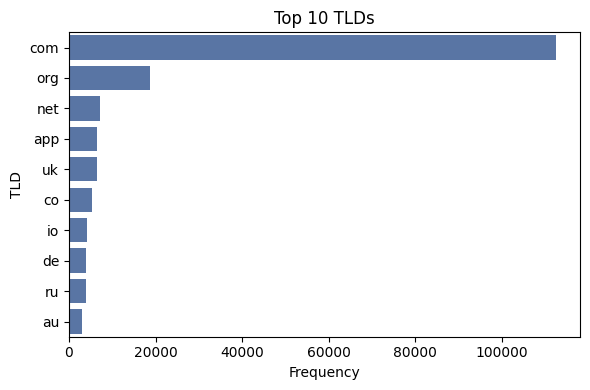

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Count the frequency of the top 10 most common TLDs:
tld_counts = total_data['TLD'].value_counts().nlargest(10)

# Bar plot:
sns.set_palette("deep")
plt.figure(figsize=(6, 4))
sns.barplot(x=tld_counts.values, y=tld_counts.index)
plt.title('Top 10 TLDs')
plt.xlabel('Frequency')
plt.ylabel('TLD')

# Adjust layout:
plt.tight_layout()

# Show the plot:
plt.show()

In [9]:
# Total TLDs number:
print("There are", total_data['TLD'].value_counts().shape[0], "unique TLDs in the dataset.")

# Convert the values and indices into a table:
tld_table = pd.DataFrame({'Frequency': tld_counts.values}, index=tld_counts.index)

# Show table:
print('Top 10 most common TDLs: \n' , tld_table)

There are 695 unique TLDs in the dataset.
Top 10 most common TDLs: 
      Frequency
TLD           
com     112382
org      18792
net       7076
app       6467
uk        6395
co        5408
io        4174
de        3994
ru        3870
au        2979


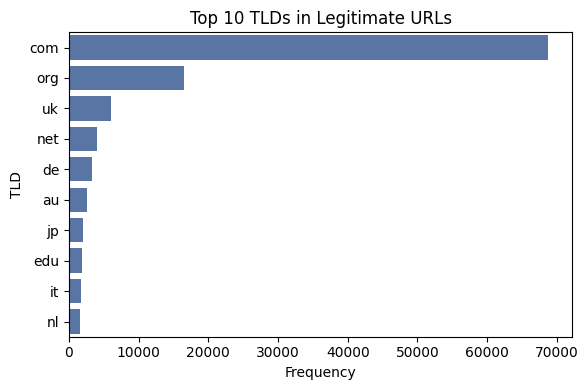

In [10]:
# Filter data to isolate the most common TLDs associated with legitimate URLs:
tld_legit = total_data[total_data['label'] == 1]

# Count the frequency of the top 10 most common TLDs:
tld_counts_legit = tld_legit['TLD'].value_counts().nlargest(10)

# Bar plot:
sns.set_palette("deep")
plt.figure(figsize=(6, 4))
sns.barplot(x=tld_counts_legit.values, y=tld_counts_legit.index)
plt.title('Top 10 TLDs in Legitimate URLs')
plt.xlabel('Frequency')
plt.ylabel('TLD')

# Adjust layout:
plt.tight_layout()

# Show the plot:
plt.show()

In [11]:
# Total TLDs number for Phishing URLs:
print("There are", tld_legit['TLD'].value_counts().shape[0], "unique TLDs for Legitimate URLs in the dataset.")

# Count the frequency of the top 10 most common TLDs for Legitimate URLs:
tld_counts_legit = tld_legit['TLD'].value_counts().nlargest(10)

# Calculate the percentage of the top 10 most common TLDs in Legitimate URLs from the total of the top 10 TLDs:
total_top_tlds = tld_counts.sum()
top_tld_percentages = (tld_counts_legit / total_top_tlds) * 100

# Create dataframe with percentage information:
top_tld_table = pd.DataFrame({'Frequency': tld_counts_legit, 'Percentage': top_tld_percentages.round(2)})

# Show table:
print(top_tld_table)

There are 473 unique TLDs for Legitimate URLs in the dataset.
     Frequency  Percentage
TLD                       
com      68785       40.10
org      16524        9.63
uk        6073        3.54
net       3998        2.33
de        3310        1.93
au        2606        1.52
jp        2082        1.21
edu       1856        1.08
it        1669        0.97
nl        1536        0.90


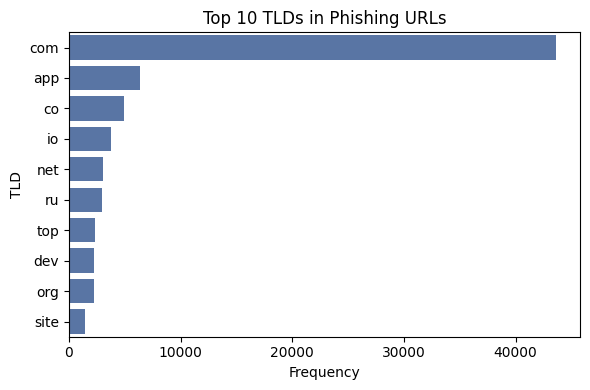

In [12]:
# Filter data to isolate the most common TLDs associated with phishing URLs:
tld_phishing = total_data[total_data['label'] == 0]

# Count the frequency of the top 10 most common TLDs:
tld_counts_phishing = tld_phishing['TLD'].value_counts().nlargest(10)

# Bar plot:
sns.set_palette("deep")
plt.figure(figsize=(6, 4))
sns.barplot(x=tld_counts_phishing.values, y=tld_counts_phishing.index)
plt.title('Top 10 TLDs in Phishing URLs')
plt.xlabel('Frequency')
plt.ylabel('TLD')

# Adjust layout:
plt.tight_layout()

# Show the plot:
plt.show()

In [13]:
# Total TLDs number for Phishing URLs:
print("There are", tld_phishing['TLD'].value_counts().shape[0], "unique TLDs for Phishing URLs in the dataset.")

# Count the frequency of the top 10 most common TLDs for Phishing URLs:
tld_counts_phishing = tld_phishing['TLD'].value_counts().nlargest(10)

# Calculate the percentage of the top 10 most common TLDs in Phishing URLs from the total of the top 10 TLDs:
total_top_tlds = tld_counts.sum()
top_tld_percentages = (tld_counts_phishing / total_top_tlds) * 100

# Create dataframe with percentage information:
top_tld_table = pd.DataFrame({'Frequency': tld_counts_phishing, 'Percentage': top_tld_percentages.round(2)})

# Show table:
print(top_tld_table)

There are 556 unique TLDs for Phishing URLs in the dataset.
      Frequency  Percentage
TLD                        
com       43597       25.42
app        6327        3.69
co         4950        2.89
io         3742        2.18
net        3078        1.79
ru         2978        1.74
top        2325        1.36
dev        2289        1.33
org        2268        1.32
site       1465        0.85


**TLDs conclusions:**
- The most common TLD is 'com' for both legitimate URLs (40.10% of all legitimate URLs) and phishing (25.42% of all phishing URLs).
- The 'org' appears in the top 2 for legitimate (9.63% of all legitimate URLs) and in the penultimate place for phishing (1.32% of all phishing URLs).
- There are more unique TLDs used in phishing URLs (556) than in legitimate URLs (473).

**Categorical-Categorical Analysis**:

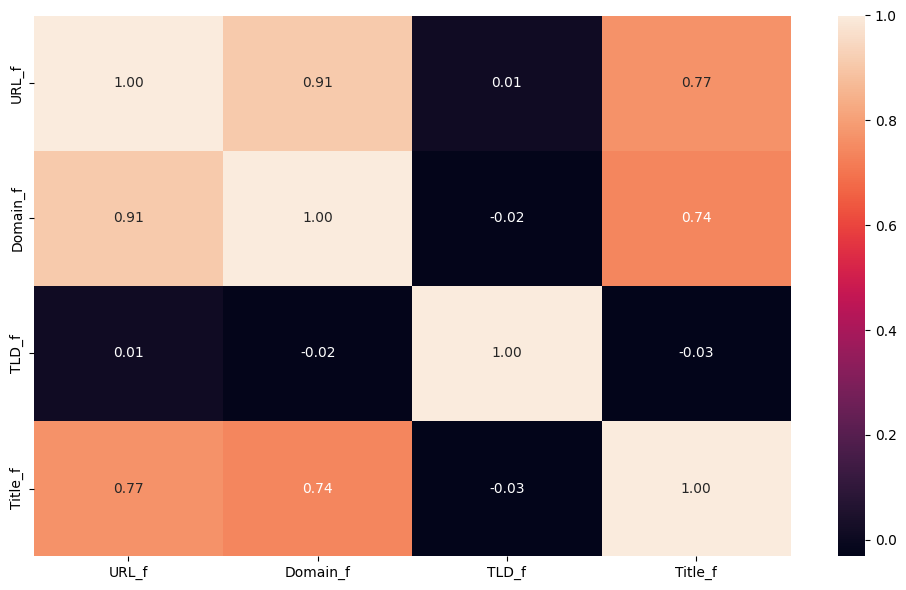

In [14]:
total_data['URL_f'] = pd.factorize(total_data['URL'])[0]
total_data['Domain_f'] = pd.factorize(total_data['Domain'])[0]
total_data['TLD_f'] = pd.factorize(total_data['TLD'])[0]
total_data['Title_f'] = pd.factorize(total_data['Title'])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[['URL_f', 'Domain_f', 'TLD_f', 'Title_f']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

**Conclusions:**
- As expected, there is a very good correlation between URL and Domain with a value equal to 0.91. 
- The correlation  Title-URL and Title-Domain is also strong, 0.77 and 0.74 respectively.

##### **2.3.2: Numerical Variables**
- From the 49 numerical variables, we have selected those with the strongest correlations to the target variable 'label'. To achieve this, we created a correlation matrix and represented it as a heatmap for clearer interpretation of the results.

**Numerical-Numerical Analysis**:

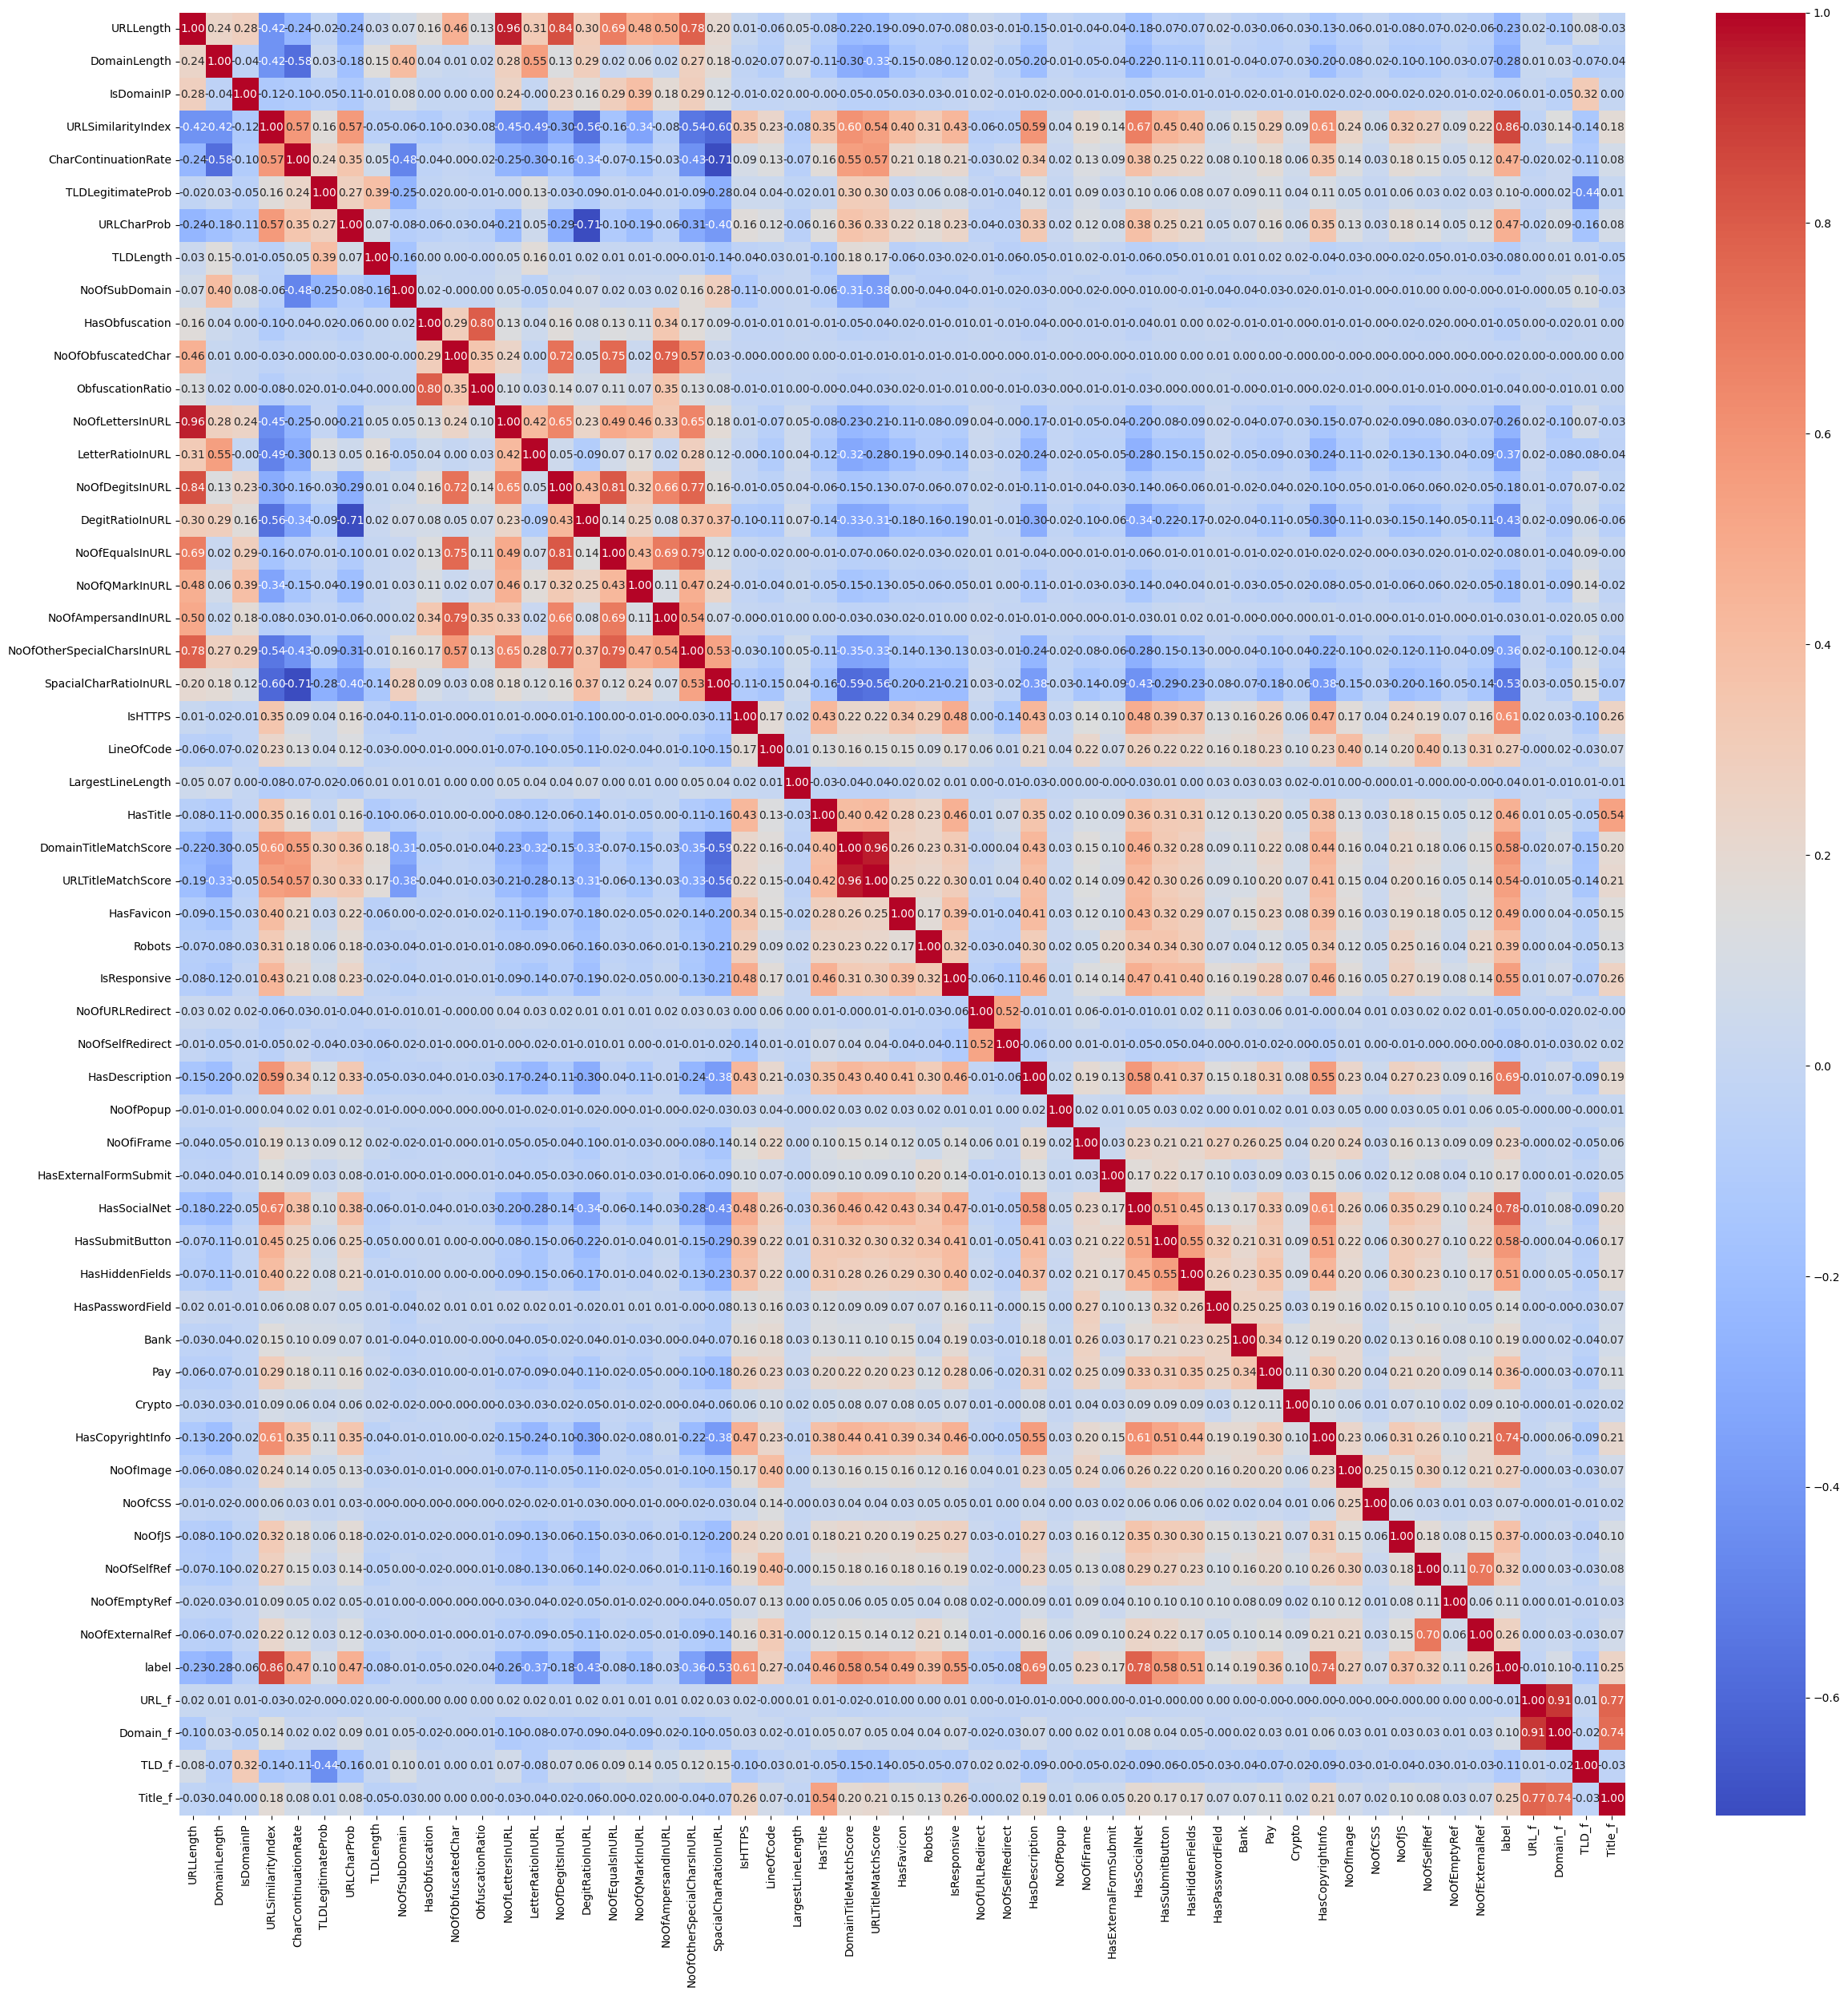

In [15]:
# Heat Map for numerical variables:

num_var = total_data.drop(columns = ['URL', 'Domain', 'TLD', 'Title'])

# Calculate the correlation matrix:

corr_matrix = num_var.corr()

fig, ax = plt.subplots(figsize = (25, 25))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", ax = ax)

plt.tight_layout()

plt.show()

In [16]:
# Correlation table with ascending values to select the best correlated features:
corr_table = corr_matrix['label'].sort_values(ascending = False)
print(corr_table)

label                         1.000000
URLSimilarityIndex            0.860342
HasSocialNet                  0.783882
HasCopyrightInfo              0.743197
HasDescription                0.690011
IsHTTPS                       0.610253
DomainTitleMatchScore         0.584204
HasSubmitButton               0.578816
IsResponsive                  0.548977
URLTitleMatchScore            0.538844
HasHiddenFields               0.507715
HasFavicon                    0.493607
URLCharProb                   0.469521
CharContinuationRate          0.467162
HasTitle                      0.460337
Robots                        0.392461
NoOfJS                        0.373162
Pay                           0.359724
NoOfSelfRef                   0.315867
NoOfImage                     0.274365
LineOfCode                    0.271970
NoOfExternalRef               0.258339
Title_f                       0.246935
NoOfiFrame                    0.225567
Bank                          0.188886
HasExternalFormSubmit    

**Strongest correlations conclusions:**
- The features selected for this analysis were those with correlation values between 0.35 and 1.00. In total, 21 numerical variables were chosen.
- List of features selected: URLSimilarityIndex, HasSocialNet, HasCopyrightInfo, HasDescription, IsHTTPS, DomainTitleMatchScore, HasSubmitButton, IsResponsive, URLTitleMatchScore, HasHiddenFields, HasFavicon, URLCharProb, CharContinuationRate, HasTitle, Robots, NoOfJS, Pay, NoOfOtherSpecialCharsInURL, LetterRatioInURL, DegitRatioInURL and SpacialCharRatioInURL.

**Index, Score, Ratio and Rate Numerical Features:**
- For the Index, Score, Ratio and Rate Numerical features, we have used histograms and box plots to visualize their distributions.
- The descriptions and representations of the features are as follows:

- **URLSimilarityIndex**: The maximum USI is considered 100, and the minimum is 0. All legitimate URLs will have a USI of 100. An index close to 100 may indicate a phishing URL that looks very similar to a legitimate URL. And the URLs which indexes are lower than 100 are all considered phishing.

- **DomainTitleMatchScore**: The maximum DTMS is considered 100, and the minimum is 0. A score of 100 indicates a perfect match between the domain and its title, while a score close to 100 may indicate a phishing attempt. Domains with a score lower than 100 are considered suspicious and potentially malicious.

- **URLTitleMatchScore**:  A lower score can be a sign that the website is a phishing attempt because the webpage title does not match the content that is expected to be found on the website. A higher score 100 or close to 100 indicates that the website is what it claims to be.

- **URLCharProb**: Many phishing URLs contain random alphabet, digits, and misspelled words. A high URLCharProb suggests that the character distribution in the URL closely matches that of legitimate URLs, while a low URLCharProb may indicate an atypical or potentially malicious URL.

- **CharContinuationRate**: A high CharContinuationRate indicates that the sequence of characters in the URL follows common patterns seen in legitimate URLs. Otherwise, a low CharContinuationRate may suggest that the website is a phishing with atypical character sequences.

- **LetterRatioInURL**: This metric indicates the proportion of alphabetical characters within a URL. A high letter ratio suggests that the URL contains a significant number of letters compared to other types of characters, which is often characteristic of legitimate URLs. But also, legitimate URLs tend to be shorter and more concise, while fraudulent URLs may contain longer strings of letters or other characters in an attempt to disguise their true purpose. Thus, while **a high letter ratio might initially suggest legitimacy**, other factors such as length and coherence also play crucial roles in determining the authenticity of a URL.

- **DigitRatioInURL**: A high digit ratio suggests that the URL contains a significant number of numbers compared to other types of characters (such as letters, symbols, etc.). This can be useful for identifying potentially phishing URLs, as legitimate URLs often have a lower proportion of digits.

- **SpecialCharRatioInURL**: A high special character ratio suggests that the URL contains a significant number of special characters compared to letters and digits. The legitimate URLs typically have a lower proportion of special characters.

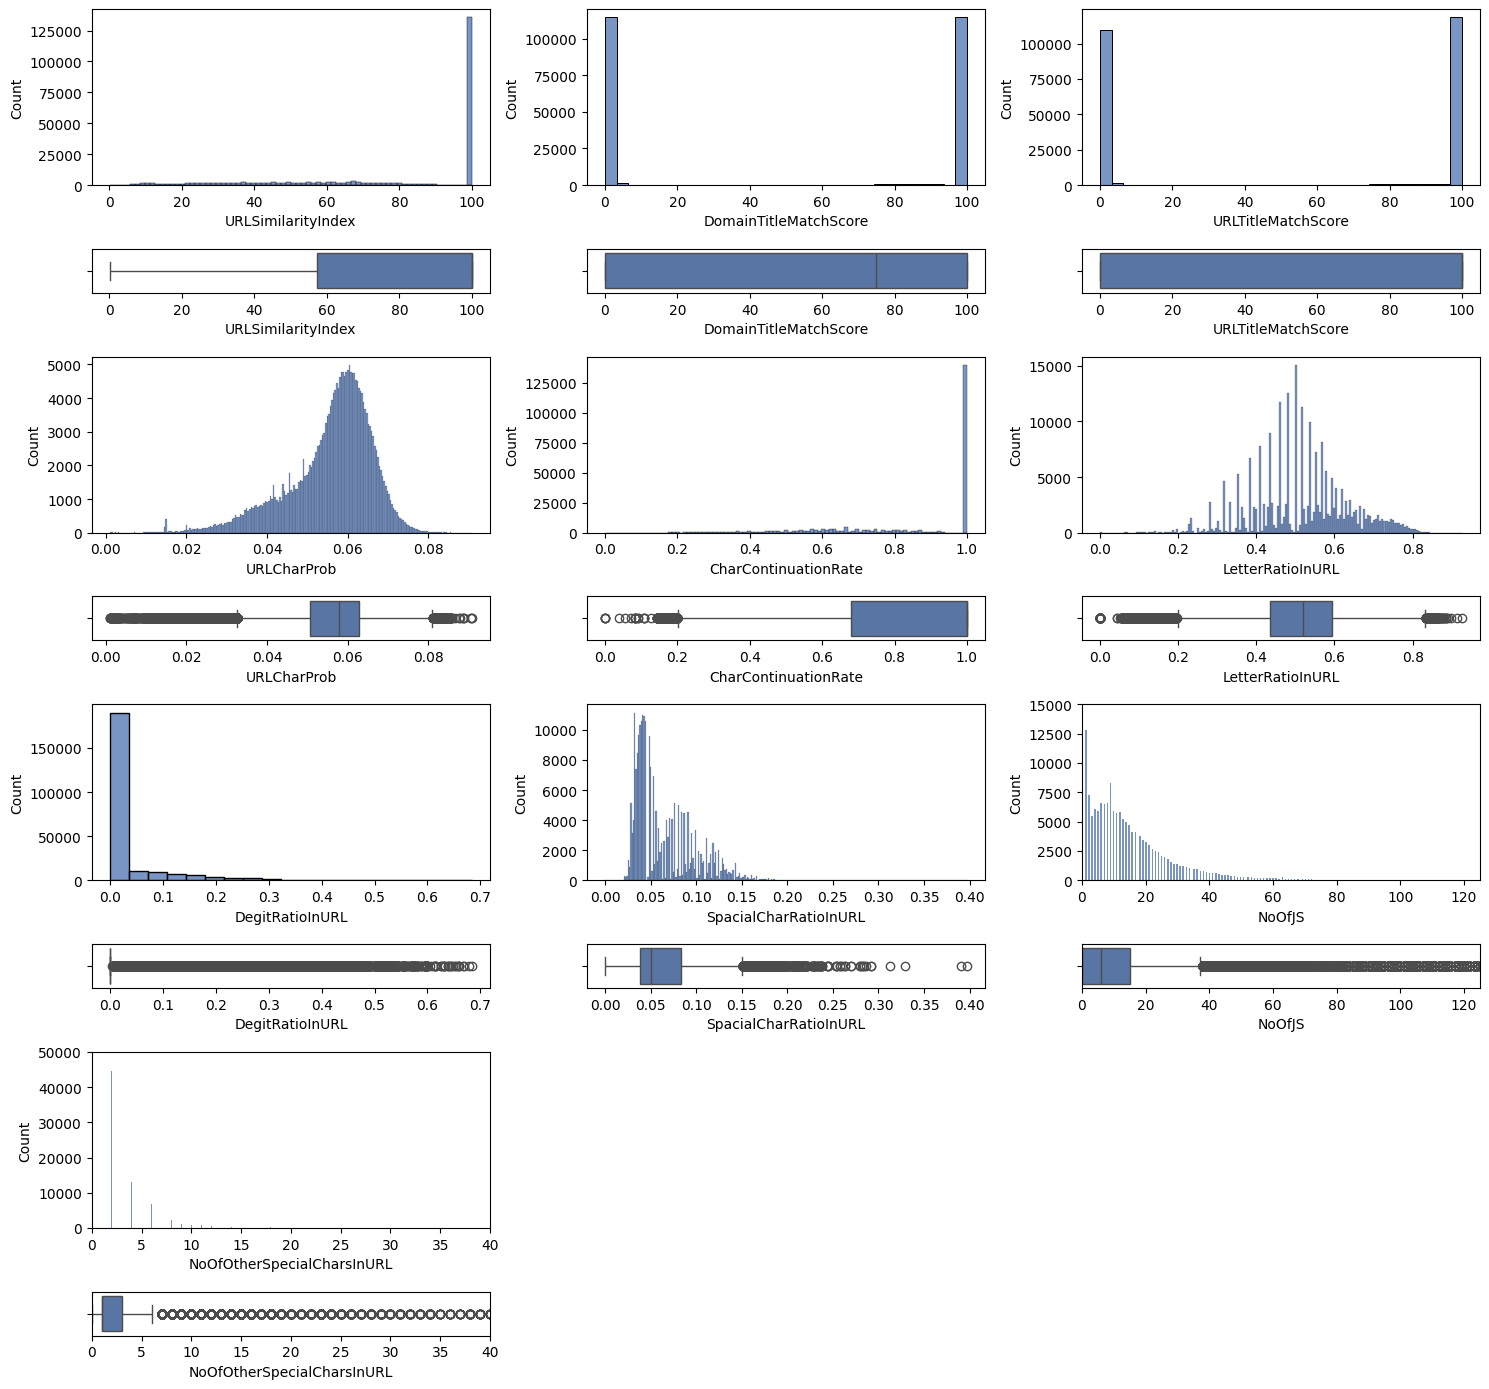

In [17]:
# Numerical Univariate Analysis:
# Histograms and boxplot for numerical variables:

sns.set_palette("deep")

fig, axis = plt.subplots(8, 3, figsize = (15, 14), gridspec_kw = {"height_ratios": [4, 1] * 4})

sns.histplot(ax = axis[0, 0], data = total_data, x = "URLSimilarityIndex")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "URLSimilarityIndex")

sns.histplot(ax = axis[0, 1], data = total_data, x = "DomainTitleMatchScore")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "DomainTitleMatchScore")

sns.histplot(ax = axis[0, 2], data = total_data, x = "URLTitleMatchScore")
sns.boxplot(ax = axis[1, 2], data = total_data, x = "URLTitleMatchScore")

sns.histplot(ax = axis[2, 0], data = total_data, x = "URLCharProb")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "URLCharProb")

sns.histplot(ax = axis[2, 1], data = total_data, x = "CharContinuationRate")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "CharContinuationRate")

sns.histplot(ax = axis[2, 2], data = total_data, x = "LetterRatioInURL")
sns.boxplot(ax = axis[3, 2], data = total_data, x = "LetterRatioInURL")

sns.histplot(ax = axis[4, 0], data = total_data, x = "DegitRatioInURL")
sns.boxplot(ax = axis[5, 0], data = total_data, x = "DegitRatioInURL")

sns.histplot(ax = axis[4, 1], data = total_data, x = "SpacialCharRatioInURL")
sns.boxplot(ax = axis[5, 1], data = total_data, x = "SpacialCharRatioInURL")

x_lim1 = (0, 125)  
y_lim_hist1 = (0, 15000)  

sns.histplot(ax = axis[4, 2], data = total_data, x = "NoOfJS")
sns.boxplot(ax = axis[5, 2], data = total_data, x = "NoOfJS")
axis[4, 2].set_xlim(x_lim1)
axis[4, 2].set_ylim(y_lim_hist1)
axis[4, 2].set_ylim(y_lim_hist1)
axis[5, 2].set_xlim(x_lim1)

x_lim2 = (0, 40)  
y_lim_hist2 = (0, 50000)  

sns.histplot(ax = axis[6, 0], data = total_data, x = "NoOfOtherSpecialCharsInURL")
sns.boxplot(ax = axis[7, 0], data = total_data, x = "NoOfOtherSpecialCharsInURL")
axis[6, 0].set_xlim(x_lim2)
axis[6, 0].set_ylim(y_lim_hist2)
axis[6, 0].set_ylim(y_lim_hist2)
axis[7, 0].set_xlim(x_lim2)

fig.delaxes(axis[6, 1])
fig.delaxes(axis[7, 1])
fig.delaxes(axis[6, 2])
fig.delaxes(axis[7, 2])

# Adjust layout:
plt.tight_layout()

# Show the plot:
plt.show()

In [18]:
# Filter the specific column that we want to analyse:
filtered_data = total_data[total_data['NoOfOtherSpecialCharsInURL'] == 1]

# Count label values:
label_counts = filtered_data['label'].value_counts()

# Show the result:
print(label_counts)


label
1    106017
0     24982
Name: count, dtype: int64


**Conclusions**:
- **URLSimilarityIndex**: all legitimate URLs (label = 1) have USI equal to 100. However, 786 phishing URLs also have it, what indicates extremely high similarity between the legitimate ones and their corresponding phishing.

- **DomainTitleMatchScore**: 73% of legitimate URLs and 16% of phishing have a score equal to 100. 80% of phishing have it equal to zero. However, there is a discrepancy because 24% of legitimate URLs with a score equal to zero can be found in the dataset.

- **URLTitleMatchScore**: 73% of legitimate and 19% of phishing have a score equal to 100. 74% of phishing and 24% of legitimate have it equal to zero, where we could find again a discrepancy in the dataset.

- **URLCharProb**: for this feature, we observe some similarity to the behavior of a normal distribution. The curve has a negative skewness what indicates that there are more unusual low values and a higher frequency of outliers. The data is most concentrated between the range of 0.04 and 0.07.

- **CharContinuationRate**: 78% of legitimate URLs and 35% of phishing URLs have a rate equal to 1.0.

- **LetterRatioInURL**: for this feature, we also observe some similarity to the behavior of a normal distribution with outliers. The data is most concentrated between the range of 0.04 and 0.06.

- **DigitRatioInURL**: 97% of legitimate URLs and 53% of phishing URLs have a ratio equal to zero. 

- **SpecialCharRatioInURL**: for this feature, we also observe some similarity to the behavior of a normal distribution. The curve has a positive skewness what indicates that there are more unusual high values and a higher frequency of outliers.  The data is most concentrated between the range of 0.02 and 0.05.

- **NoOfJS**: most phishing URLs do not contain any JavaScript files, whereas the majority of legitimate URLs include more than 5 JavaScript files.

- **NoOfOtherSpecialCharsInURL**: the majority of legitimate URLs contain only one 'OtherSpecialCharsInURL', whereas most phishing URLs contain more than two of them.

**Boolean Numerical Features:**
- To illustrate the distribution of Boolean numerical features between legitimate and phishing URLs, we have employed bar plots.
- The names of these features are self-explanatory, and their representations are as follows:

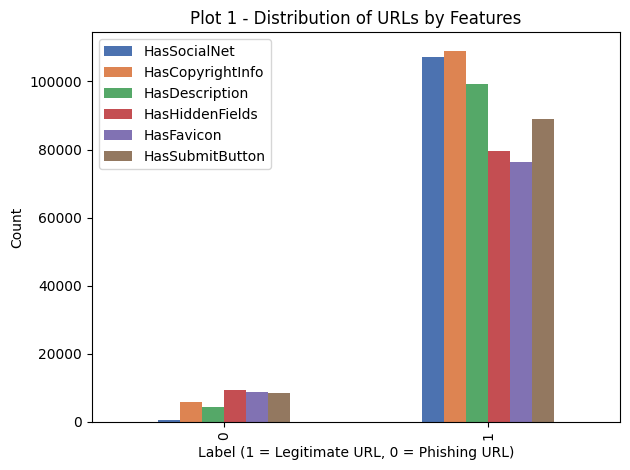

In [19]:
import matplotlib.pyplot as plt

# Group data by "label":
data_grouped = total_data.groupby('label').sum()

# Select variables to represent in barplot:
variables = ['HasSocialNet', 'HasCopyrightInfo', 'HasDescription', 'HasHiddenFields', 'HasFavicon', 'HasSubmitButton']

# Barplot:
data_grouped[variables].plot(kind = 'bar', stacked = False)

# Adjust Layout
plt.xlabel('Label (1 = Legitimate URL, 0 = Phishing URL)')
plt.ylabel('Count')
plt.title('Plot 1 - Distribution of URLs by Features')
plt.tight_layout()

# Plot the Data
plt.show()

In [37]:
# Filter the specific column that we want to analyse:
filtered_data = total_data[total_data['HasSubmitButton'] == 1]

# Count label values:
label_counts = filtered_data['label'].value_counts()

# Show the result:
print(label_counts)

label
1    89120
0     8483
Name: count, dtype: int64


**Conclusions for Plot 1**:
- All boolean features selected for Plot 1 are important aspects to consider when evaluating the legitimacy of a URL.  These features are commonly associated with legitimate URLs.

- **HasSocialNet**: 79% of legitimate URLs have social networking information while just 0.5% of phishing URLs have them.
- **HasCopyrightInfo**: 81% of legitimate URLs have Copyright information while 5.6% of phishing URLs have them.
- **HasDescription**: 74% of legitimate URLs have description while 4.4% of phishing URLs have them.
- **HasHiddenFields**: 59% of legitimate URLs have hidden fields while 9.3% of phishing URLs have them.
- **HasFavicon**: 57% of legitimate URLs have Favicon while 6.5% of phishing URLs have them.
- **HasSubmitButton**: 66% of legitimate URLs have submission botton, compared to 8.4% of phishing URLs.

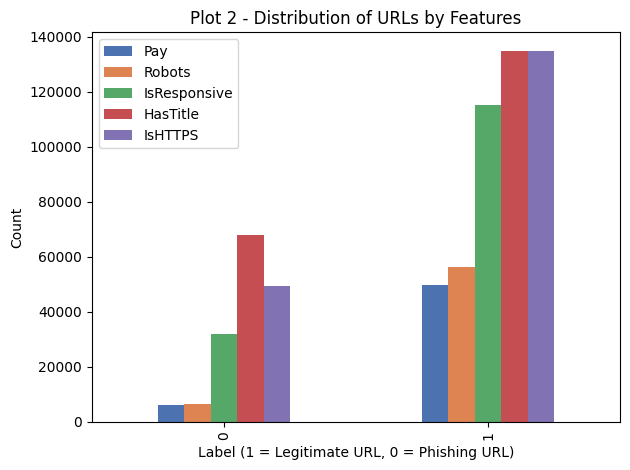

In [39]:
import matplotlib.pyplot as plt

# Group data by "label":
data_grouped = total_data.groupby('label').sum()

# Select variables to represent in barplot:
variables = ['Pay', 'Robots', 'IsResponsive', 'HasTitle', 'IsHTTPS']

# Barplot:
data_grouped[variables].plot(kind = 'bar', stacked = False)

# Adjust Layout
plt.xlabel('Label (1 = Legitimate URL, 0 = Phishing URL)')
plt.ylabel('Count')
plt.title('Plot 2 - Distribution of URLs by Features')
plt.tight_layout()

# Plot the Data
plt.show()

**Conclusions for Plot 2**:
- **Pay**: Only 37% of legitimate URLs have payment functionalities, compared to 6% of phishing URLs.
- **Robots**: Only 46% of legitimate URLs have robots.txt files, compared to 6.5% of phishing URLs. This indicates that the presence of robots.txt is not as common a feature as others we have observed.
- **IsResponsive**: 85% of legitimate URLs are responsive while 32% of phishing URLs have them.
- **HasTitle** : 99.9% of legitimate URLs have title while 68% of phishing URLs have them.
- **IsHTTPS**: 100% of legitimate URLs are HTTPS while 49% of phishing URLs have them.

**Numerical-Categorical Analysis**:

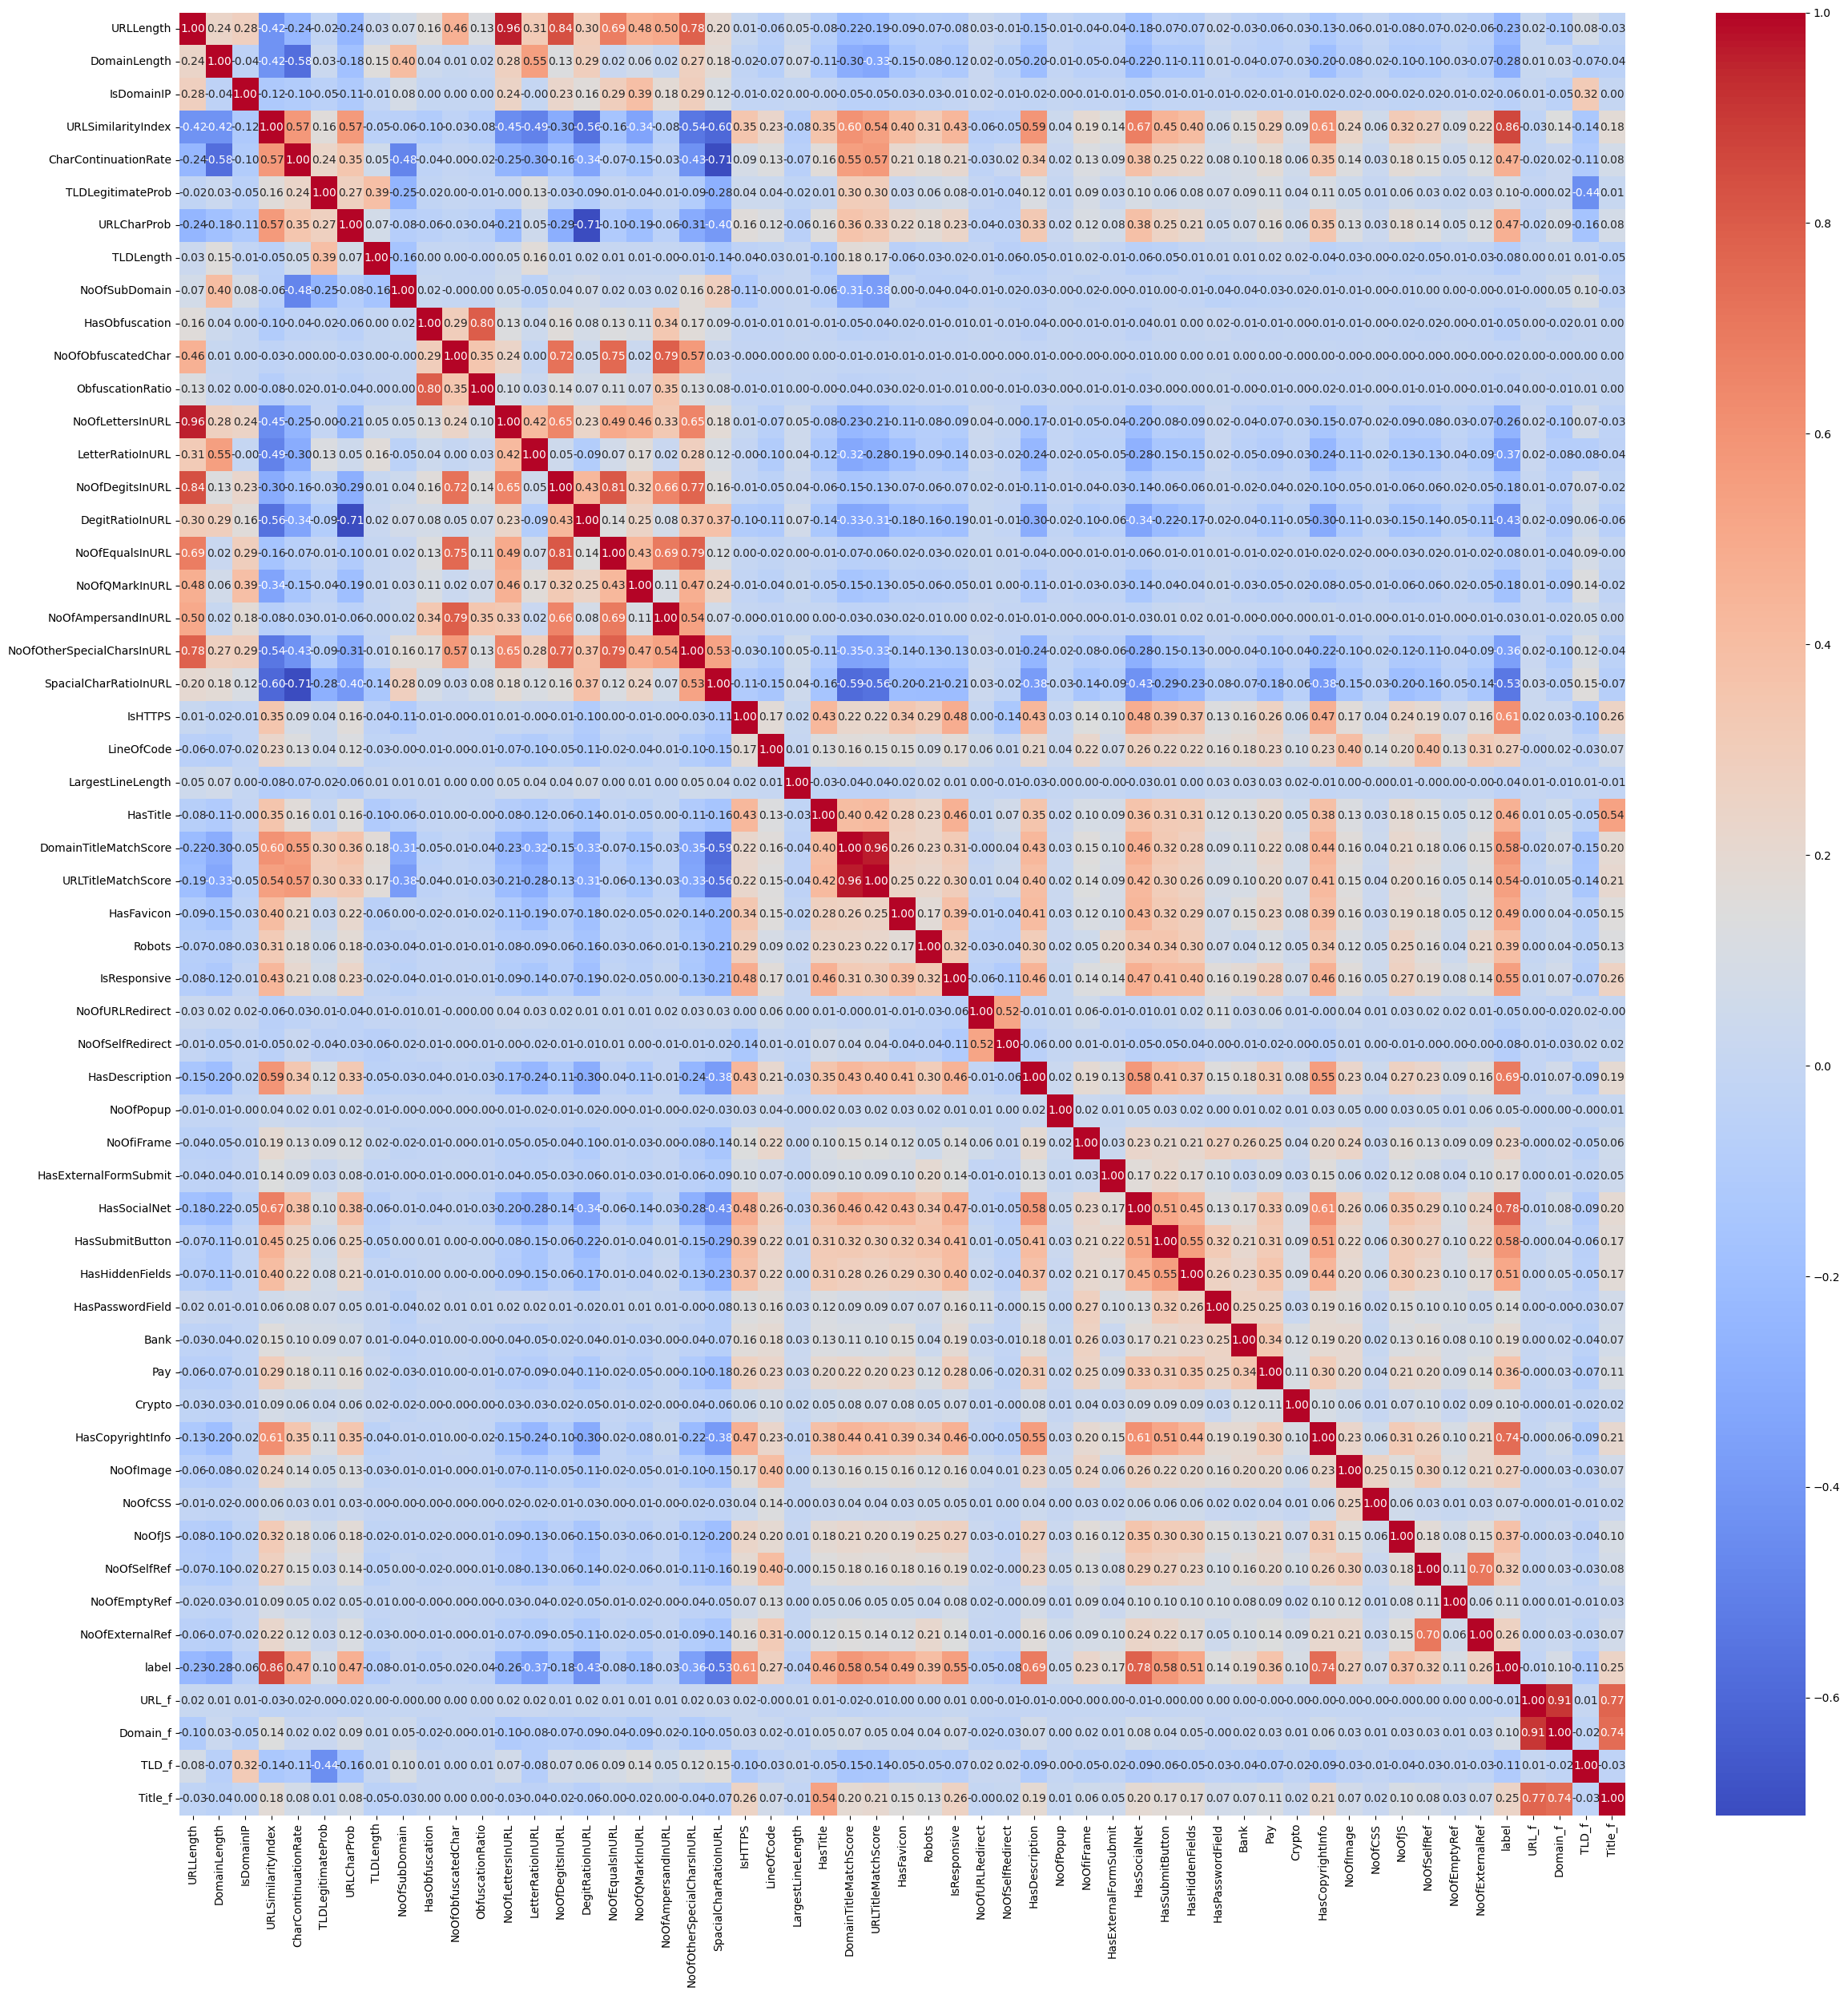

In [24]:
# Heat Map for numerical variables:
fact_num_data = total_data.drop(columns = ['URL', 'Domain', 'TLD', 'Title'])

# Calculate the correlation matrix:
corr_matrix = num_var.corr()

# Heat Map:
fig, ax = plt.subplots(figsize = (25, 25))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", ax = ax)

plt.tight_layout()

plt.show()

**Conclusions**:
- The categorical features do not show much correlation with the numerical ones, except for the 'Title' and 'Has Title' variables, which have a correlation of 0.54, and 'TLD' and 'TLDLegitimateProb', which have a correlation of -0.44, which are the most relevant ones.

##### **2.4: Feature Engineering**

**Missing value analysis**:

In [41]:
# Count NaN

fact_num_data.isnull().sum().sort_values(ascending = False)

URLLength                     0
Pay                           0
NoOfURLRedirect               0
NoOfSelfRedirect              0
HasDescription                0
NoOfPopup                     0
NoOfiFrame                    0
HasExternalFormSubmit         0
HasSocialNet                  0
HasSubmitButton               0
HasHiddenFields               0
HasPasswordField              0
Bank                          0
Crypto                        0
Robots                        0
HasCopyrightInfo              0
NoOfImage                     0
NoOfCSS                       0
NoOfJS                        0
NoOfSelfRef                   0
NoOfEmptyRef                  0
NoOfExternalRef               0
label                         0
URL_f                         0
Domain_f                      0
TLD_f                         0
IsResponsive                  0
HasFavicon                    0
DomainLength                  0
LetterRatioInURL              0
IsDomainIP                    0
URLSimil

**Outlier Analysis**:

- Since almost all our features are calculated by a equation, we did not eliminate the outliers, as they are part of the results for the URL features and not expected to be caused by errors in data collection.

**Descriptive Analysis**:

In [42]:
fact_num_data.describe()

URLLength   DomainLength     IsDomainIP  URLSimilarityIndex  \
count  235370.000000  235370.000000  235370.000000       235370.000000   
mean       34.545516      21.456022       0.002702           78.497537   
std        41.332730       9.127733       0.051912           28.947899   
min        13.000000       4.000000       0.000000            0.155574   
25%        23.000000      16.000000       0.000000           57.166667   
50%        27.000000      20.000000       0.000000          100.000000   
75%        34.000000      24.000000       0.000000          100.000000   
max      6097.000000     110.000000       1.000000          100.000000   

       CharContinuationRate  TLDLegitimateProb    URLCharProb      TLDLength  \
count         235370.000000      235370.000000  235370.000000  235370.000000   
mean               0.845900           0.260503       0.055760       2.764269   
std                0.216384           0.251618       0.010583       0.599667   
min                0.000000           0.000000       0.001083       2.000000   
25%                0.680000           0.005977       0.050771       2.000000   
50%                1.000000           0.079963       0.057979       3.000000   
75%                1.000000           0.522907       0.062882       3.000000   
max                1.000000           0.522907       0.090824      13.000000   

       NoOfSubDomain  HasObfuscation  ...        NoOfCSS         NoOfJS  \
count  235370.000000   235370.000000  ...  235370.000000  235370.000000   
mean        1.164957        0.002052  ...       6.343251      10.538697   
std         0.600695        0.045254  ...      74.933461      22.328711   
min         0.000000        0.000000  ...       0.000000       0.000000   
25%         1.000000        0.000000  ...       0.000000       0.000000   
50%         1.000000        0.000000  ...       2.000000       6.000000   
75%         1.000000        0.000000  ...       8.000000      15.000000   
max        10.000000        1.000000  ...   35820.000000    6957.000000   

         NoOfSelfRef   NoOfEmptyRef  NoOfExternalRef          label  \
count  235370.000000  235370.000000    235370.000000  235370.000000   
mean       65.187777       2.381162        49.348936       0.572928   
std       176.825605      17.656516       161.159863       0.494654   
min         0.000000       0.000000         0.000000       0.000000   
25%         0.000000       0.000000         1.000000       0.000000   
50%        12.000000       0.000000        10.000000       1.000000   
75%        88.000000       1.000000        58.000000       1.000000   
max     27397.000000    4887.000000     27516.000000       1.000000   

               URL_f       Domain_f          TLD_f        Title_f  
count  235370.000000  235370.000000  235370.000000  235370.000000  
mean   117684.500000  105319.391957      23.265446   84408.298046  
std     67945.610767   64970.780855      53.251539   62897.734822  
min         0.000000       0.000000       0.000000       0.000000  
25%     58842.250000   47756.250000       0.000000   24965.250000  
50%    117684.500000  103948.500000       2.000000   81612.500000  
75%    176526.750000  161587.750000      23.000000  139292.750000  
max    235369.000000  220085.000000     694.000000  197781.000000  

[8 rows x 55 columns]

**Divide the set into Train and Test**:

In [43]:
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples

X = fact_num_data.drop('label', axis = 1)
y = fact_num_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train

URLLength  DomainLength  IsDomainIP  URLSimilarityIndex  \
40020          26            19           0          100.000000   
187266         27            20           0          100.000000   
117504         37            29           0           89.623464   
144378         59            16           0           26.114510   
58594          29            22           0          100.000000   
...           ...           ...         ...                 ...   
119988         38            32           0           53.145209   
103769         23            16           0          100.000000   
132063         35            28           0          100.000000   
147030         22            15           0          100.000000   
122072         28            22           0           78.102664   

        CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
40020               1.000000           0.522907     0.066724          3   
187266              0.692308           0.001993     0.048056          2   
117504              0.720000           0.522907     0.045218          3   
144378              1.000000           0.522907     0.064391          3   
58594               1.000000           0.522907     0.054861          3   
...                      ...                ...          ...        ...   
119988              0.347826           0.007505     0.062237          4   
103769              1.000000           0.001588     0.050310          2   
132063              0.750000           0.522907     0.057150          3   
147030              1.000000           0.522907     0.056471          3   
122072              0.571429           0.522907     0.070407          3   

        NoOfSubDomain  HasObfuscation  ...  NoOfImage  NoOfCSS  NoOfJS  \
40020               1               0  ...         48        7      17   
187266              2               0  ...          9        2       7   
117504              1               0  ...          0        0       0   
144378              1               0  ...          0        0       0   
58594               1               0  ...          8       16      23   
...               ...             ...  ...        ...      ...     ...   
119988              1               0  ...          0        0       0   
103769              1               0  ...         49        2       9   
132063              2               0  ...          1        6       6   
147030              1               0  ...         10        6      10   
122072              1               0  ...          0        0       2   

        NoOfSelfRef  NoOfEmptyRef  NoOfExternalRef   URL_f  Domain_f  TLD_f  \
40020           193             1              203   40012     38985      0   
187266           85             0               35  187013    175897     46   
117504            0             0                0  117400    111627      0   
144378            1             0                1  144224    136522      0   
58594             8             0               11   58575     56574      0   
...             ...           ...              ...     ...       ...    ...   
119988            0             0                0  119879    113942     61   
103769          122             4               48  103694     98889      5   
132063           21             2               20  131932    125128      0   
147030          325             0                9  146867    138964      0   
122072            0             0                0  121958    115878      0   

        Title_f  
40020     33877  
187266   157679  
117504        6  
144378   121952  
58594     49778  
...         ...  
119988        6  
103769    87987  
132063   111633  
147030   124167  
122072        6  

[188296 rows x 54 columns]

**Feature scaling**:

We calculated the MinMax Scaler, but since it is not necessary for our models, we did not use the scaled features.

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = X_train.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = X_test.columns)

X_train_scal.head()

URLLength  DomainLength  IsDomainIP  URLSimilarityIndex  \
40020    0.002137      0.141509         0.0            1.000000   
187266   0.002301      0.150943         0.0            1.000000   
117504   0.003945      0.235849         0.0            0.896073   
144378   0.007561      0.113208         0.0            0.259994   
58594    0.002630      0.169811         0.0            1.000000   

        CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
40020               1.000000           1.000000     0.731178   0.090909   
187266              0.692308           0.003812     0.522946   0.000000   
117504              0.720000           1.000000     0.491293   0.090909   
144378              1.000000           1.000000     0.705156   0.090909   
58594               1.000000           1.000000     0.598857   0.090909   

        NoOfSubDomain  HasObfuscation  ...  NoOfImage   NoOfCSS    NoOfJS  \
40020             0.1             0.0  ...   0.005360  0.000195  0.002444   
187266            0.2             0.0  ...   0.001005  0.000056  0.001006   
117504            0.1             0.0  ...   0.000000  0.000000  0.000000   
144378            0.1             0.0  ...   0.000000  0.000000  0.000000   
58594             0.1             0.0  ...   0.000893  0.000447  0.003306   

        NoOfSelfRef  NoOfEmptyRef  NoOfExternalRef     URL_f  Domain_f  \
40020      0.007045      0.000205         0.007378  0.169998  0.177137   
187266     0.003103      0.000000         0.001272  0.794556  0.799227   
117504     0.000000      0.000000         0.000000  0.498793  0.507202   
144378     0.000037      0.000000         0.000036  0.612760  0.620318   
58594      0.000292      0.000000         0.000400  0.248866  0.257056   

           TLD_f   Title_f  
40020   0.000000  0.171286  
187266  0.066282  0.797244  
117504  0.000000  0.000030  
144378  0.000000  0.616604  
58594   0.000000  0.251684  

[5 rows x 54 columns]

##### **2.5: Feature Selection**

In [47]:
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split

# With a value of k = 21 we implicitly mean that we want to remove 32 features from the model
selection_model = SelectKBest(f_classif, k = 21)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

URLSimilarityIndex  CharContinuationRate  URLCharProb  LetterRatioInURL  \
0          100.000000              1.000000     0.066724             0.500   
1          100.000000              0.692308     0.048056             0.481   
2           89.623464              0.720000     0.045218             0.568   
3           26.114510              1.000000     0.064391             0.695   
4          100.000000              1.000000     0.054861             0.552   

   DegitRatioInURL  NoOfOtherSpecialCharsInURL  SpacialCharRatioInURL  \
0            0.000                         1.0                  0.038   
1            0.000                         2.0                  0.074   
2            0.162                         2.0                  0.054   
3            0.000                         4.0                  0.102   
4            0.000                         1.0                  0.034   

   IsHTTPS  HasTitle  DomainTitleMatchScore  ...  HasFavicon  Robots  \
0      1.0       1.0                  100.0  ...         1.0     1.0   
1      1.0       1.0                    0.0  ...         1.0     0.0   
2      1.0       0.0                    0.0  ...         0.0     0.0   
3      1.0       1.0                    0.0  ...         0.0     0.0   
4      1.0       1.0                  100.0  ...         0.0     0.0   

   IsResponsive  HasDescription  HasSocialNet  HasSubmitButton  \
0           1.0             1.0           1.0              0.0   
1           1.0             1.0           1.0              1.0   
2           0.0             0.0           0.0              0.0   
3           0.0             0.0           0.0              0.0   
4           1.0             0.0           0.0              0.0   

   HasHiddenFields  Pay  HasCopyrightInfo  NoOfJS  
0              1.0  1.0               1.0    17.0  
1              1.0  1.0               1.0     7.0  
2              0.0  0.0               0.0     0.0  
3              0.0  0.0               0.0     0.0  
4              1.0  0.0               1.0    23.0  

[5 rows x 21 columns]

In [48]:
print(X_train_sel.columns)

Index(['URLSimilarityIndex', 'CharContinuationRate', 'URLCharProb',
       'LetterRatioInURL', 'DegitRatioInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'HasTitle', 'DomainTitleMatchScore',
       'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive',
       'HasDescription', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'Pay', 'HasCopyrightInfo', 'NoOfJS'],
      dtype='object')


The features selected by SelectKBest using f_classif matched those identified by the strongest correlations chosen by us for both univariate and multivariate analysis.

In [51]:
X_train_sel['label'] = list(y_train)
X_test_sel['label'] = list(y_test)
X_train_sel.to_csv("/workspaces/proyecto-final-Phishing-URL/data/processed/X_train_sel.csv", index = False)
X_test_sel.to_csv("/workspaces/proyecto-final-Phishing-URL/data/processed/X_test_sel.csv", index = False)

In [50]:
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split

# With a value of k = 21 we implicitly mean that we want to remove 32 features from the model
selection_model = SelectKBest(f_classif, k = 21)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel_scal = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train.columns.values[ix])
X_test_sel_scal = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test.columns.values[ix])

X_train_sel_scal.head()

URLSimilarityIndex  CharContinuationRate  URLCharProb  LetterRatioInURL  \
0            1.000000              1.000000     0.731178          0.539957   
1            1.000000              0.692308     0.522946          0.519438   
2            0.896073              0.720000     0.491293          0.613391   
3            0.259994              1.000000     0.705156          0.750540   
4            1.000000              1.000000     0.598857          0.596112   

   DegitRatioInURL  NoOfOtherSpecialCharsInURL  SpacialCharRatioInURL  \
0         0.000000                    0.002004               0.095718   
1         0.000000                    0.004008               0.186398   
2         0.236842                    0.004008               0.136020   
3         0.000000                    0.008016               0.256927   
4         0.000000                    0.002004               0.085642   

   IsHTTPS  HasTitle  DomainTitleMatchScore  ...  HasFavicon  Robots  \
0      1.0       1.0                    1.0  ...         1.0     1.0   
1      1.0       1.0                    0.0  ...         1.0     0.0   
2      1.0       0.0                    0.0  ...         0.0     0.0   
3      1.0       1.0                    0.0  ...         0.0     0.0   
4      1.0       1.0                    1.0  ...         0.0     0.0   

   IsResponsive  HasDescription  HasSocialNet  HasSubmitButton  \
0           1.0             1.0           1.0              0.0   
1           1.0             1.0           1.0              1.0   
2           0.0             0.0           0.0              0.0   
3           0.0             0.0           0.0              0.0   
4           1.0             0.0           0.0              0.0   

   HasHiddenFields  Pay  HasCopyrightInfo    NoOfJS  
0              1.0  1.0               1.0  0.002444  
1              1.0  1.0               1.0  0.001006  
2              0.0  0.0               0.0  0.000000  
3              0.0  0.0               0.0  0.000000  
4              1.0  0.0               1.0  0.003306  

[5 rows x 21 columns]

In [33]:
X_train_sel_scal['label'] = list(y_train)
X_test_sel_scal['label'] = list(y_test)
X_train_sel_scal.to_csv("/workspaces/proyecto-final-Phishing-URL/data/processed/X_train_sel_scal.csv", index = False)
X_test_sel_scal.to_csv("/workspaces/proyecto-final-Phishing-URL/data/processed/X_test_sel_scal.csv", index = False)

## **TEST:**

- Reduce the features to see if Streamlit goes faster.

In [52]:
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split

# With a value of k = 10 we implicitly mean that we want to remove 44 features from the model
selection_model = SelectKBest(f_classif, k = 10)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

URLSimilarityIndex  SpacialCharRatioInURL  IsHTTPS  DomainTitleMatchScore  \
0          100.000000                  0.038      1.0                  100.0   
1          100.000000                  0.074      1.0                    0.0   
2           89.623464                  0.054      1.0                    0.0   
3           26.114510                  0.102      1.0                    0.0   
4          100.000000                  0.034      1.0                  100.0   

   URLTitleMatchScore  IsResponsive  HasDescription  HasSocialNet  \
0               100.0           1.0             1.0           1.0   
1                 0.0           1.0             1.0           1.0   
2                 0.0           0.0             0.0           0.0   
3                 0.0           0.0             0.0           0.0   
4               100.0           1.0             0.0           0.0   

   HasSubmitButton  HasCopyrightInfo  
0              0.0               1.0  
1              1.0               1.0  
2              0.0               0.0  
3              0.0               0.0  
4              0.0               1.0

In [53]:
X_train_sel['label'] = list(y_train)
X_test_sel['label'] = list(y_test)
X_train_sel.to_csv("/workspaces/proyecto-final-Phishing-URL/data/processed/X_train_sel_10.csv", index = False)
X_test_sel.to_csv("/workspaces/proyecto-final-Phishing-URL/data/processed/X_test_sel_10.csv", index = False)